In [ ]:
#extract zip with files for this to work, can't push > 100MB

def find_two_column_sequences(filepath):
    with open(filepath, 'r', encoding='utf-8') as file:
        line_number = 0
        in_sequence = False
        sequence_start = None

        for raw_line in file:
            line_number += 1
            line = raw_line.strip()

            if not line: 
                continue

            columns = line.split('\t')

            if len(columns) == 2:
                if not in_sequence:
                    sequence_start = line_number
                    in_sequence = True
            else:
                if in_sequence:
                    print(f"Sequence of 2-column lines from line {sequence_start} to {line_number - 1}")
                    in_sequence = False


        if in_sequence:
            print(f"Sequence of 2-column lines from line {sequence_start} to {line_number}")



In [ ]:
for i in range(6):
    print(f'corpus{i}')
    find_two_column_sequences(f'fullCorpus{i}.txt')


In [ ]:
for i in range(6):
   
    print(f"fullCorpus{i}.txt")

    with open(f'fullCorpus{i}.txt', 'r', encoding='utf-8') as file:
        line_number = 0
        for raw_line in file:
            line_number += 1
            if line_number == 66550:
                print(raw_line.strip())
            if line_number == 70000:
                print(raw_line.strip())
            if line_number == 130000:
                print(raw_line.strip())
                break
                
    
    
    

    

In [ ]:
# Latin 4
# Sequence of 2-column lines from line 1 to 66556 : Cesars De Bello Gallico (BG)
# Sequence of 2-column lines from line 66558 to 86555: Ovid's Ars Amatoria (AA)
# Sequence of 2-column lines from line 126056 to 146067: Pliny the Younger Epistulae (EP)



In [ ]:
def extract_lines(input_file, start_line, end_line, output_file):
    with open(input_file, 'r', encoding='utf-8') as infile, open(output_file, 'w', encoding='utf-8') as outfile:
        for current_line_number, line in enumerate(infile, start=1):
            if start_line <= current_line_number <= end_line:
                outfile.write(line)
                
extract_lines('fullCorpus0.txt', 1, 66556, 'cesar.txt')
extract_lines('fullCorpus0.txt', 66558, 86555, 'ovid.txt')
extract_lines('fullCorpus0.txt', 126056, 146067, 'pliny.txt')


In [ ]:
book_starts = [
     ("LIBER_PRIMUS", ["Litteris", "a", "Fabio", "C.", "Caesaris", "consulibus", "redditis"]),
        ("LIBER_SECUNDUS", ["Dum", "haec", "in", "Hispania", "geruntur"]), # not in the text?
        # ("LIBER_TERTIUS", []),
    ("COMENTARIUS_PRIMUS", ["Gallia", "est", "omnis", "divisa", "in", "partes", "tres"]),
    ("COMENTARIUS_SECUNDUS", ["Cum", "esset", "Caesar", "in", "citeriore", "Gallia"]),
    ("COMENTARIUS_TERTIUS", ["Cum", "in", "Italiam", "proficisceretur"]),
    ("COMENTARIUS_QUARTUS", ["Ea", "quae", "secuta", "est", "hieme"]),
    ("COMENTARIUS_QUINTUS", ["L.", "Domitio", "Ap.", "Claudio"]),
    ("COMENTARIUS_SEXTUS", ["Multis", "de", "causis", "Caesar", "maiorem"]),
    ("COMENTARIUS_SEPTIMUS", ["Gaio", "Trebonio", "legato"]),
    ("COMENTARIUS_OCTAVUS", ["Coactus", "assiduis", "tuis", "vocibus"]),
]

def split_books(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        lines = f.readlines()

    words = [line.strip().split('\t')[1] for line in lines if '\t' in line]

    current_book = None
  

    start_idx = 0
    for i in range(len(words)):
        for book_name, start_seq in book_starts:
            if words[i:i+len(start_seq)] == start_seq:
                if current_book:
                    with open(f"{current_book}.txt", 'w', encoding='utf-8') as f_out:
                        f_out.writelines(lines[start_idx:i])
                    print(f"Saved {current_book}.txt from line {start_idx} to {i-1}")

                current_book = book_name
                start_idx = i
                break


    if current_book:
        with open(f"{current_book}.txt", 'w', encoding='utf-8') as f_out:
            f_out.writelines(lines[start_idx:])
        print(f"Saved {current_book}.txt from line {start_idx} to {len(lines)-1}")

split_books('../CleanedData/cesar.txt')


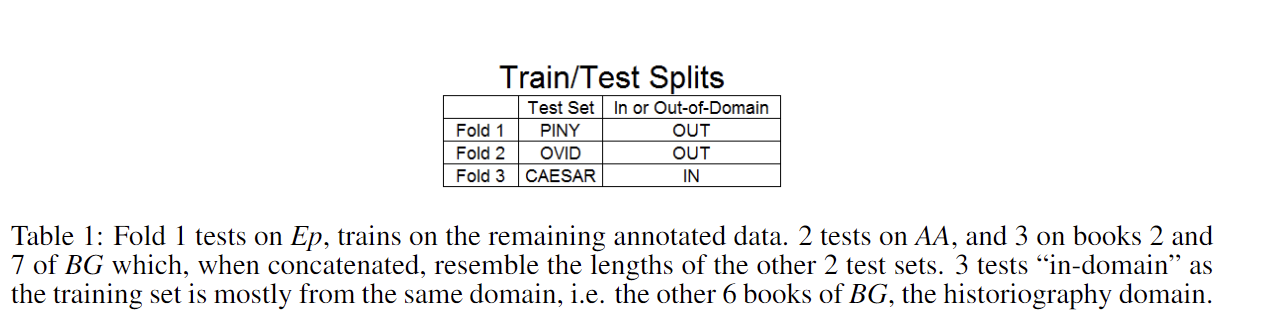

##RUN FROM THIS CELL DOWN

In [58]:
def open_book(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    words = [line.strip().split('\t')[1] for line in lines if '\t' in line]
    return words


EP = open_book('pliny.txt')
BG = open_book('cesar.txt')
AA = open_book('ovid.txt')
BG1 = open_book('COMENTARIUS_PRIMUS.txt')
BG2 = open_book('COMENTARIUS_SECUNDUS.txt')
BG3 = open_book('COMENTARIUS_TERTIUS.txt')
BG4 = open_book('COMENTARIUS_QUARTUS.txt')
BG5 = open_book('COMENTARIUS_QUINTUS.txt')
BG6 = open_book('COMENTARIUS_SEXTUS.txt')
BG7 = open_book('COMENTARIUS_SEPTIMUS.txt')
BG8 = open_book('COMENTARIUS_OCTAVUS.txt')

test1 = EP
train1 = BG + AA
print (f'Test 1: {len(test1)}')
print (f'Train 1: {len(train1)}')
test2 = AA
train2 = BG + EP
print (f'Test 2: {len(test2)}')
print (f'Train 2: {len(train2)}')

test3 = BG2+BG7
train3 = BG1+BG3+BG4+BG5+BG6+BG8  # + EP + AA ?????
print (f'Test 3: {len(test3)}')
print (f'Train 3: {len(train3)}')





Test 1: 18676
Train 1: 81289
Test 2: 17564
Train 2: 82401
Test 3: 10239
Train 3: 48895


In [38]:
# Creating a script to have the right format for words and labels in an array for Word2Vec
# Previous script (open_book) does not include labels, but it's still great for a quick generation of words-only data
def create_sentence_arrays(filename):
    """
    Grabs pre-split files, and puts them in an array for Word2Vec
    Sentence example: [('C.', PRS-B), ('Plinius', PRS-I)]
    """
    sentences, sentence = [], []
    with open(filename, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if not line: # Clever way to check for sentence break 
                if sentence:
                    sentences.append(sentence)
                    sentence = []
            else:
                label, word = line.split('\t')
                sentence.append((word, label))
        if sentence:
            sentences.append(sentence)
    return sentences

In [39]:
# Word2Vec
from gensim.models import Word2Vec
sentences = create_sentence_arrays("pliny.txt")
sentences_for_w2v = [[word for word, label in sentence] for sentence in sentences]
w2v = Word2Vec(sentences=sentences_for_w2v, vector_size=100, window=5, min_count=1)

In [40]:
# Vectorizing each sentence, as Word2Vec only gives word vectors, but we need full sentences put together.
import numpy as np
def vectorize_sentence(sentence, model):
    vectors = []
    for word, _ in sentence:
        if word in model.wv:
            vectors.append(model.wv[word])
        else:
            vectors.append(np.zeros(model.vector_size))
    return np.array(vectors)

X = [vectorize_sentence(sentence, w2v) for sentence in sentences]
y = [[label for _, label in sentence] for sentence in sentences]

# Still needs to be padded out for training a model (something about that during one of the lectures was mentioned)
# labels also generated as we will need to somehow grab estimations ;)

In [41]:
from sklearn.cluster import KMeans


word_vectors = np.array([w2v.wv[word] for word in w2v.wv.index_to_key])
kmeans = KMeans(n_clusters=100, random_state=42).fit(word_vectors)


word_to_cluster = {word: cluster for word, cluster in zip(w2v.wv.index_to_key, kmeans.labels_)}


pred_labels = []
for sentence in sentences_for_w2v:
    pred_labels.append([word_to_cluster.get(word, -1) for word in sentence])

# for cluster_id in range(n_clusters):
#     print(f"\nCluster {cluster_id}:")
#     words_in_cluster = [word for word, cl in word_to_cluster.items() if cl == cluster_id]
#     print(words_in_cluster[:10])


In [42]:
from collections import defaultdict
from sklearn.metrics import classification_report


true_flat = []
for sentence in y:
    for label in sentence:
        true_flat.append(1 if label != '0' else 0)
pred_flat = []
for sentence in pred_labels:
    pred_flat.extend(sentence)
cluster_to_true = defaultdict(list)
for p, t in zip(pred_flat, true_flat):
    cluster_to_true[p].append(t)
cluster_to_entity = {
    cluster_id: (sum(labels) / len(labels)) >= 0.5
    for cluster_id, labels in cluster_to_true.items()
}
pred_entity_flat = [int(cluster_to_entity[p]) for p in pred_flat]


print(classification_report(true_flat, pred_entity_flat, target_names=["Non-Entity", "Entity"]))


              precision    recall  f1-score   support

  Non-Entity       0.97      1.00      0.98     18058
      Entity       0.51      0.09      0.15       618

    accuracy                           0.97     18676
   macro avg       0.74      0.54      0.56     18676
weighted avg       0.95      0.97      0.96     18676



Results are shit, Kmeans are shit. try DBSCAN

In [43]:
from sklearn.cluster import DBSCAN
import numpy as np


word_vectors = np.array([w2v.wv[word] for word in w2v.wv.index_to_key])
dbscan = DBSCAN(eps=0.15, min_samples=2).fit(word_vectors)
word_to_cluster = {
    word: cluster_id for word, cluster_id in zip(w2v.wv.index_to_key, dbscan.labels_)
}
#repeated, to run without touching clustering
pred_labels = []
for sentence in sentences_for_w2v:  
    pred_labels.append([word_to_cluster.get(word, -1) for word in sentence])

In [44]:
num_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
print(f"DBSCAN found {num_clusters} clusters")


DBSCAN found 2 clusters


In [45]:
from sklearn.metrics import pairwise_distances

dists = pairwise_distances(word_vectors)
avg_dist = np.mean(dists)
min_dist = np.min(dists[np.nonzero(dists)])
max_dist = np.max(dists)

print(f"Avg dist: {avg_dist:.4f}, Min dist: {min_dist:.4f}, Max dist: {max_dist:.4f}")


Avg dist: 0.1101, Min dist: 0.0561, Max dist: 3.4825


In [ ]:
sentences = create_sentence_arrays("pliny.txt")
test_sentences = create_sentence_arrays("ovid.txt")

sentences_for_w2v = [[word for word, label in sentence] for sentence in sentences]
test_sentences_for_w2v = [[word for word, label in sentence] for sentence in test_sentences]


In [66]:

# High level overview of unsupervised NER pipeline
# 1. Load BERT embeddings
# 2. Cluster embeddings
# 3. Map clusters to entity/non-entity
# 4. Evaluate baseline
# 5. Train reconstructor neural net
# 6. Evaluate reconstructor

from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np
from sklearn.cluster import KMeans
from collections import defaultdict
from sklearn.metrics import classification_report
import torch.nn as nn

def get_bert_embeddings(passed_text):
    tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-cased")
    model = AutoModel.from_pretrained("bert-base-multilingual-cased")
    model.eval()  

    # get embeddings from BERT (from subword to word level)

    all_tokens = []  # each item will be {'word': ..., 'embedding': ..., 'sentence_idx': ...}

    with torch.no_grad():  
        for idx, sentence in enumerate(passed_text):
            # Tokenize the sentence → BERT tokenizer splits into subwords, maps tokens to ids
            encoded = tokenizer(sentence, return_tensors='pt', truncation=True, is_split_into_words=True, padding=True)
            
            # pass tokenized sentences through BERT model to get embeddings as last hidden state
            outputs = model(**encoded)
            embeddings = outputs.last_hidden_state.squeeze(0)  

            word_ids = encoded.word_ids(0)  # maps subword positions to original word indices

            
            token_vecs = []  # will hold one embedding per original token
            last_word_idx = None
            subword_accum = [] #temporary storage for subword embeddings

            for emb, word_idx in zip(embeddings, word_ids):
                if word_idx is None:
                    continue  # skip special tokens 
                if word_idx != last_word_idx and subword_accum:
                
                    avg_embedding = torch.mean(torch.stack(subword_accum), dim=0)
                    token_vecs.append((avg_embedding, last_word_idx))
                    subword_accum = []
                subword_accum.append(emb)
                last_word_idx = word_idx

            #last word
            if subword_accum:
                avg_embedding = torch.mean(torch.stack(subword_accum), dim=0)
                token_vecs.append((avg_embedding, last_word_idx))

            for emb_vec, word_pos in token_vecs:
                all_tokens.append({
                    'word': sentence[word_pos],
                    'embedding': emb_vec,  
                    'sentence_idx': idx
                })

    print(f"Total tokens processed: {len(all_tokens)}")
    return [token['embedding'] for token in all_tokens]

In [67]:
#embs to numpy to utilize clustering
word_embeddings = get_bert_embeddings(sentences_for_w2v) 
test_word_embeddings = get_bert_embeddings(test_sentences_for_w2v)


Total tokens processed: 18676
Total tokens processed: 17564


I put a cut here so that I don't constantly have to redo the parameters

In [126]:

X = torch.stack(word_embeddings).numpy()  # shape: (num_tokens, hidden_size)
X_test = torch.stack(test_word_embeddings).numpy()  # shape: (num_tokens, hidden_size)

y = [[label for _, label in sentence] for sentence in sentences]
y_test = [[label for _, label in sentence] for sentence in test_sentences]

# clustering itself starts here
n_clusters = 10_000 #play with it
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
cluster_ids = kmeans.labels_  # extract id of the cluster for each token


In [127]:

true_flat = [label for word in y for label in word] #gold labels 
test_flat = [label for word in y_test for label in word] #gold labels for test set

# prediction of other texts
y_pred = kmeans.predict(X_test) # prediction of other texts

cluster_to_true = defaultdict(list)
for c_id, t in zip(cluster_ids, true_flat): # c_id = cluster id, t = true label
    cluster_to_true[c_id].append(t) # count how many entities in each cluster

cluster_to_entity = {cid: max(set(labels), key = labels.count) for cid, labels in cluster_to_true.items()}
# !TBD 50% is not set in stone, play with it
print(f"Cluster mapping (Entity clusters): {[cid for cid, is_entity in cluster_to_entity.items() if is_entity]}")

# Predict entity/non-entity per token based on its cluster
pred_entity_flat = [cluster_to_entity[c_id] for c_id in cluster_ids]
pred_entity_flat_test = [cluster_to_entity[c_id] for c_id in y_pred]
print("\n BASELINE evaluation")
print(classification_report(true_flat, pred_entity_flat))
print("\n TEST evaluation")
print(classification_report(test_flat, pred_entity_flat_test))

from plyer import notification
notification.notify(message='Jupyter Finished!')

Cluster mapping (Entity clusters): [3189, 3225, 378, 4869, 66, 74, 2284, 6597, 4400, 3490, 6988, 9229, 3965, 7070, 9738, 5778, 4865, 9690, 3348, 2423, 8987, 6173, 851, 1209, 7490, 5969, 6927, 3812, 8140, 6095, 2643, 628, 2733, 547, 7991, 4190, 1892, 1983, 5128, 154, 5751, 2674, 6428, 11, 6161, 771, 8925, 8482, 2675, 6807, 8034, 6805, 409, 5895, 1685, 7785, 55, 64, 26, 9773, 3585, 5617, 238, 1398, 6663, 3060, 2406, 9272, 4496, 4174, 4590, 2111, 728, 5781, 2876, 1091, 3853, 1200, 5143, 3374, 4184, 8056, 1452, 7873, 9262, 303, 302, 4505, 8223, 8993, 699, 5952, 1515, 135, 8992, 5525, 3123, 701, 4415, 8959, 3753, 6689, 3804, 2841, 8479, 5489, 4504, 2069, 6748, 2338, 1870, 7855, 2953, 533, 4637, 3796, 5428, 8529, 1202, 8208, 3666, 1806, 209, 8581, 1766, 4115, 7432, 757, 9776, 71, 1026, 2968, 9454, 3045, 282, 3163, 5254, 6585, 7789, 7627, 9167, 2858, 4283, 5722, 8023, 912, 8089, 658, 3675, 7898, 9610, 1622, 1937, 6401, 8703, 5552, 1703, 5484, 6542, 2030, 759, 4330, 7342, 9520, 9616, 5371, 453

c:\Users\wenz\Documents\GitHub\Latin-NER-NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\wenz\Documents\GitHub\Latin-NER-NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\wenz\Documents\GitHub\Latin-NER-NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

Checking how many clusters is a good amount

In [128]:
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score
# from sklearn.metrics import silhouette_samples
# import matplotlib.pyplot as plt

# inertias = []
# # K = range(300, 1000, 50)  # range of k values to test
# K = [6500,7000,7500] # for testing purposes
# for k in K:
#     kmeans = KMeans(n_clusters=k, random_state=42,max_iter=500)
#     cluster_labels = kmeans.fit_predict(X)  # X is your data
#     inertias.append(silhouette_samples(X, cluster_labels).mean())

# plt.plot(K, inertias, 'bo-')
# plt.xlabel('k')
# plt.ylabel('Silhouette Score')
# plt.title('Silhouette Method')
# plt.show()

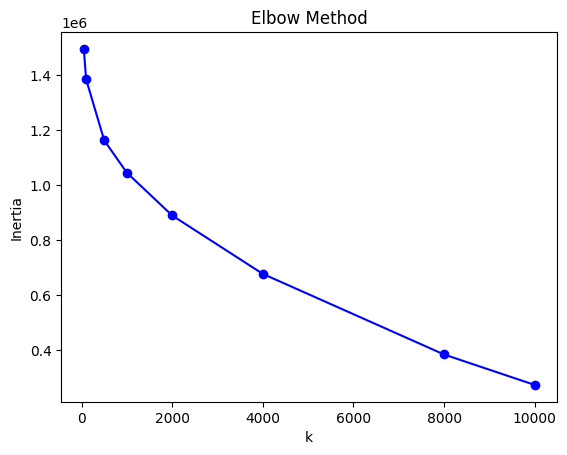 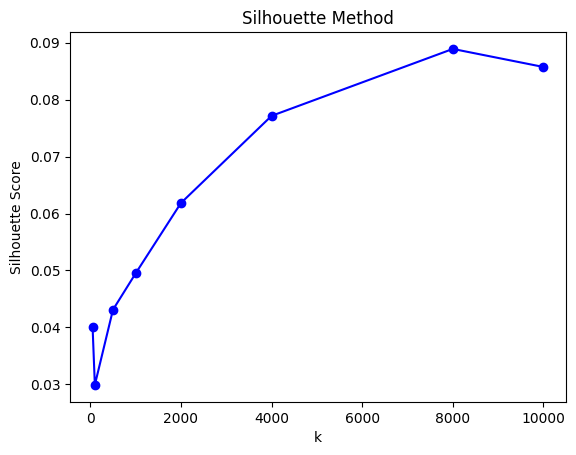

Given this image I eyeballed that a good amount of k would be 2.000 - using elbow method - and saving some computing power


Silhouette Score is more sophisticated - shows a peak at around 8000

Sanity Split

In [129]:
# reconstructing the model
# it is needed to generalize
from sklearn.metrics import f1_score
in_size = X.shape[1] # 768, standard for BERT



#Suggestions from CHAT-GPT: - seems to work better Epoch 10/10, Loss: 0.2511
reconstructor = nn.Sequential(
    nn.Linear(in_size, 32),
    nn.GELU(),
    nn.LayerNorm(32),  # or nn.BatchNorm1d(32)
    nn.Linear(32, len(set(true_flat))),  # output logits, I use BCEWithLogitsLoss, so no sigmoid here
)

# I am slowly losing my mind - I'm copzing stackoverflow now and autocomplete is actually trying to complete this comment for me
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_flat = [label for sentence in y for label in sentence]  # Flatten the list of lists
y_flat = list(label_encoder.fit_transform(y_flat)) # Encode labels as integers


X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y_flat, dtype=torch.long)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_flat = [label for sentence in y_test for label in sentence]  # Flatten the list of lists
y_test_flat = list(label_encoder.transform(y_test_flat)) # Encode labels as integers


# class imbalance handling, without it, perfomance is terrible
counts = np.bincount(y_tensor, minlength=len(set(y_flat)))
class_weights = counts.sum() / (counts + 1e-6)
class_weights = class_weights / class_weights.sum()  # optional
class_weights = torch.tensor(class_weights, dtype=torch.float32)
loss_fn = nn.CrossEntropyLoss(weight=class_weights)

optimizer = torch.optim.Adam(reconstructor.parameters(), lr=1e-3)

f1_score_list = {0:[],1:[]}
ys = [y_flat, y_test_flat]
# training
epochs = 100
for epoch in range(epochs+1):
    optimizer.zero_grad()
    logits = reconstructor(X_tensor).squeeze()  # output shape: (num_tokens,)
    loss = loss_fn(logits, y_tensor)
    loss.backward()
    optimizer.step()
    if (epoch) % 10 == 0:  # print every 50 epochs
        print(f"Epoch {epoch}/{epochs}, Loss: {loss.item():.4f}")

    for _,z in enumerate([X_tensor, X_test_tensor]):
        with torch.no_grad():
            logits = reconstructor(z).squeeze()
            recon_probs = torch.sigmoid(logits).numpy()
            recon_bin = (recon_probs >= 0.5).astype(int)
            recon_bin = torch.tensor(recon_bin, dtype=torch.long)
            predicted_classes = torch.argmax(recon_bin, dim=1).cpu().numpy()
            # Flatten the predictions and true labels for F1 score calculation
            f1_score_list[_].append(f1_score(ys[_], predicted_classes, average='weighted'))


Epoch 0/100, Loss: 2.0552
Epoch 10/100, Loss: 0.8333
Epoch 20/100, Loss: 0.5711
Epoch 30/100, Loss: 0.4150
Epoch 40/100, Loss: 0.3069
Epoch 50/100, Loss: 0.2301
Epoch 60/100, Loss: 0.1746
Epoch 70/100, Loss: 0.1330
Epoch 80/100, Loss: 0.1025
Epoch 90/100, Loss: 0.0803
Epoch 100/100, Loss: 0.0642


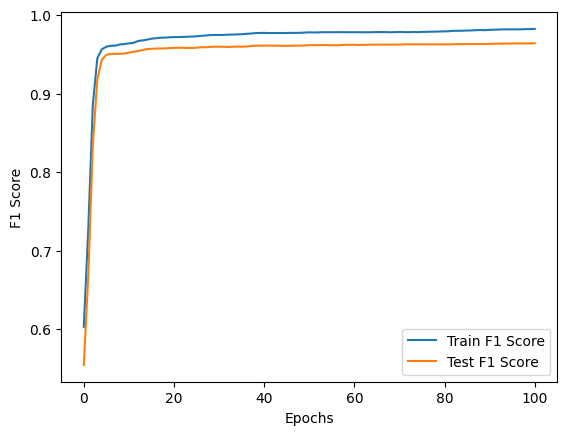

In [130]:
# Plotting the F1 score over epochs
import matplotlib.pyplot as plt
plotting_epochs = range(0, epochs+1)
plt.plot(plotting_epochs, f1_score_list[0], label='Train F1 Score')
plt.plot(plotting_epochs, f1_score_list[1], label='Test F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()


In [131]:
# predicting
ys = [y_flat, y_test_flat]
labeling = ['Train', 'Test']
for _,z in enumerate([X_tensor, X_test_tensor]):
    with torch.no_grad():
        logits = reconstructor(z).squeeze()
        recon_probs = torch.sigmoid(logits).numpy()
        recon_bin = (recon_probs >= 0.5).astype(int)  # threshold 0.5

    print(f"\n {labeling[_]}:RECONSTRUCTED {epochs} evaluation(scroll down, look at the entity metrics!)")
    recon_bin = torch.tensor(recon_bin, dtype=torch.long)
    predicted_classes = torch.argmax(recon_bin, dim=1).cpu().numpy()  # shape: [batch_size]
    print(classification_report(ys[_], predicted_classes))



 Train:RECONSTRUCTED 100 evaluation(scroll down, look at the entity metrics!)
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     18058
           1       0.35      0.94      0.51        47
           2       0.20      1.00      0.33         1
           3       0.42      0.82      0.56        34
           4       0.76      0.60      0.67       376
           5       1.00      0.18      0.31       160

    accuracy                           0.98     18676
   macro avg       0.62      0.76      0.56     18676
weighted avg       0.99      0.98      0.98     18676


 Test:RECONSTRUCTED 100 evaluation(scroll down, look at the entity metrics!)
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     16992
           1       0.15      0.29      0.19        87
           2       0.00      0.00      0.00         0
           3       0.19      0.11      0.14       107
           4       0.65      

c:\Users\wenz\Documents\GitHub\Latin-NER-NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\wenz\Documents\GitHub\Latin-NER-NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\wenz\Documents\GitHub\Latin-NER-NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.ca

In [132]:
# Metrics for both tokens and entities for Span-F1
# Grabbing data still not fully worked out, so that will be done soon
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# For token-level evaluation (i.e. Normal F1), this is how we used to do it in the past semesters
def evaluate_for_tokens(y_true_flat, y_pred_flat):
    # Weighted average accounts for class imbalance
    precision = precision_score(y_true_flat, y_pred_flat, average='weighted') 
    recall = recall_score(y_true_flat, y_pred_flat, average='weighted')
    f1 = f1_score(y_true_flat, y_pred_flat, average='weighted')
    report = classification_report(y_true_flat, y_pred_flat)
    return precision, recall, f1, report

# For entity-level evaluation (i.e. Span-F1), this is looking specifically for entitities
# It is the one that is recommended to us to use
# Calculation is the same as above just uses entities instead of tokens (not accounting for weighted average)
# Using custom calculation due to type sklearn not being able to use entities
def evaluate_for_full_entity_matches(true_entities, pred_entities):
    true_set = set((start, end, type_) for start, end, type_ in true_entities)
    pred_set = set((start, end, type_) for start, end, type_ in pred_entities)
    correct = len(true_set.intersection(pred_set))
    precision = correct / len(pred_set)
    recall = correct / len(true_set)
    f1 = 2 * precision * recall / (precision + recall)
    return precision, recall, f1

# For partial matches
def evaluate_for_partial_entity_matches(true_entities, pred_entities):
    partial_matches = 0
    for t_start, t_end, t_type in true_entities:
        for p_start, p_end, p_type in pred_entities:
            if (p_start <= t_end and p_end >= t_start and p_type == t_type): # The actual check for overlap (i.e. Partial Match)
                partial_matches += 1
                break
    precision = partial_matches / len(pred_entities)
    recall = partial_matches / len(true_entities)
    f1 = 2 * precision * recall / (precision + recall)
    return precision, recall, f1

# Converting tokens to entities
def tokens_to_entities(token_labels):
    entities = []
    current_entity = None
    for i, label in enumerate(token_labels):
        if label.startswith('B-'):
            if current_entity:
                entities.append(current_entity)
            current_entity = [i, i, label[2:]]
        elif label.startswith('I-') and current_entity and current_entity[2] == label[2:]:
            current_entity[1] = i
        elif label == 'O':
            if current_entity:
                entities.append(current_entity)
                current_entity = None
    if current_entity:
        entities.append(current_entity)
    return [(start, end, type_) for start, end, type_ in entities]

# Setting up the right format for getting entities
def process_text_file(file_path):
    # Read the file
    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    # Extract labels and words
    original_labels = []
    words = []
    for line in lines:
        if line.strip():  # Skip empty lines
            parts = line.strip().split('\t')
            if len(parts) == 2:
                label, word = parts
                original_labels.append(label)
                words.append(word)
    # Convert labels to the expected format (B-TYPE, I-TYPE, O)
    converted_labels = []
    for label in original_labels:
        if label == '0':
            converted_labels.append('O')
        elif '-B' in label:  # PRS-B -> B-PRS
            entity_type = label.split('-')[0]
            converted_labels.append(f'B-{entity_type}')
        elif '-I' in label:  # PRS-I -> I-PRS
            entity_type = label.split('-')[0]
            converted_labels.append(f'I-{entity_type}')
    # Get entities using the function
    entities = tokens_to_entities(converted_labels)
    # If you want to display the actual words in each entity
    entity_words = []
    for start, end, entity_type in entities:
        entity_text = ' '.join(words[start:end+1])
        entity_words.append((entity_text, entity_type))
    return entities, entity_words

# Example usage
file_path =  "pliny.txt"
entities, entity_words = process_text_file(file_path)
print("Entities (start, end, type):", entities)
print("Entity words:", entity_words)
print(evaluate_for_full_entity_matches(entities, entities))
print(evaluate_for_partial_entity_matches(entities, entities))

Entities (start, end, type): [(0, 1, 'PRS'), (2, 3, 'PRS'), (71, 72, 'PRS'), (73, 74, 'PRS'), (114, 114, 'PRS'), (118, 118, 'PRS'), (180, 180, 'PRS'), (302, 303, 'PRS'), (304, 305, 'PRS'), (310, 310, 'GEO'), (511, 512, 'PRS'), (513, 514, 'PRS'), (520, 520, 'GEO'), (523, 523, 'GEO'), (526, 526, 'GEO'), (529, 529, 'GEO'), (533, 533, 'GEO'), (647, 648, 'PRS'), (649, 650, 'PRS'), (655, 656, 'PRS'), (660, 660, 'PRS'), (671, 671, 'PRS'), (686, 687, 'PRS'), (702, 702, 'PRS'), (714, 714, 'PRS'), (721, 721, 'PRS'), (725, 726, 'PRS'), (734, 735, 'PRS'), (745, 745, 'PRS'), (747, 747, 'PRS'), (755, 755, 'PRS'), (760, 760, 'PRS'), (785, 785, 'PRS'), (786, 786, 'PRS'), (790, 791, 'PRS'), (793, 793, 'PRS'), (802, 803, 'PRS'), (814, 814, 'PRS'), (819, 819, 'PRS'), (827, 827, 'PRS'), (831, 831, 'PRS'), (883, 883, 'PRS'), (910, 910, 'PRS'), (916, 916, 'PRS'), (977, 978, 'PRS'), (981, 982, 'PRS'), (994, 994, 'PRS'), (1009, 1009, 'PRS'), (1038, 1038, 'PRS'), (1056, 1056, 'PRS'), (1065, 1065, 'PRS'), (1089